<a href="https://colab.research.google.com/github/NguyenTanPhats/Exercies_AI/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Colab Notebooks/flowers/flowers.train'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Colab Notebooks/flowers/flowers.train'

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 20, class_mode = 'categorical')

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:


model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_49 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_51 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [ ]:

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=32,epochs=35,verbose=1,validation_data=validation_dataset)

Epoch 1/35
432/432 [==============================] - 63s 143ms/step - loss: 1.4589 - accuracy: 0.3493 - val_loss: 1.3107 - val_accuracy: 0.4295
Epoch 2/35
432/432 [==============================] - 62s 144ms/step - loss: 1.3217 - accuracy: 0.4093 - val_loss: 1.2874 - val_accuracy: 0.4230
Epoch 3/35
432/432 [==============================] - 61s 142ms/step - loss: 1.2795 - accuracy: 0.4427 - val_loss: 1.2734 - val_accuracy: 0.4371
Epoch 4/35
432/432 [==============================] - 62s 143ms/step - loss: 1.2466 - accuracy: 0.4637 - val_loss: 1.1810 - val_accuracy: 0.4902
Epoch 5/35
432/432 [==============================] - 61s 141ms/step - loss: 1.1684 - accuracy: 0.5149 - val_loss: 1.0833 - val_accuracy: 0.5518
Epoch 6/35
432/432 [==============================] - 62s 143ms/step - loss: 1.1180 - accuracy: 0.5457 - val_loss: 1.0821 - val_accuracy: 0.5881
Epoch 7/35
432/432 [==============================] - 62s 144ms/step - loss: 1.0533 - accuracy: 0.5993 - val_loss: 1.0336 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/flowers/flowers.h5')

In [ ]:
classificationFood_model = load_model('/content/drive/MyDrive/Colab Notebooks/flowers/flowers.h5')

In [ ]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

432/432 [==============================] - 20s 46ms/step - loss: 0.5347 - accuracy: 0.8084
Test loss =  0.534697413444519
Test accuracy =  0.8084318041801453


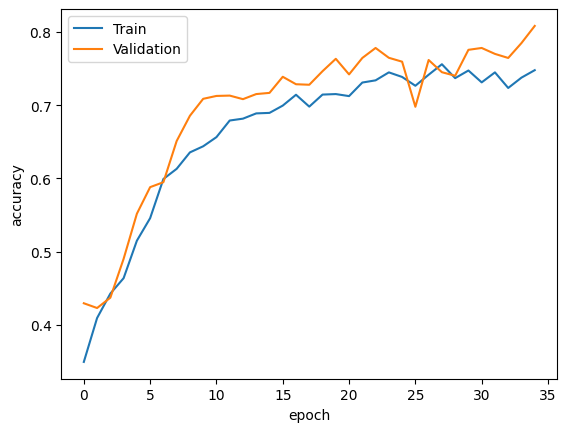

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 376ms/step
Predict is:  sunflower


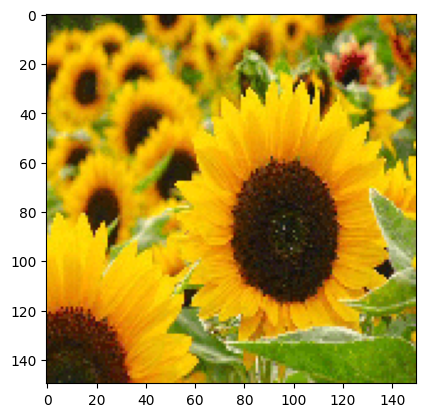

In [ ]:
img = load_img('/content/sunflowers.png',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 21ms/step
Predict is:  rose


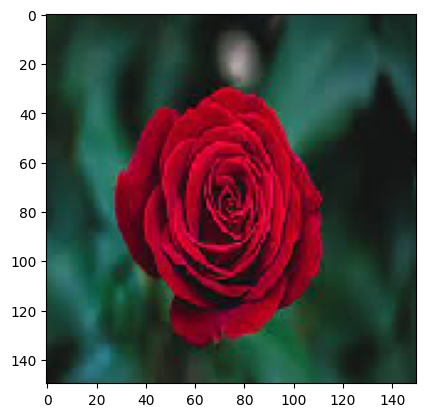

In [ ]:
img = load_img('/content/download.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 27ms/step
Predict is:  daisy


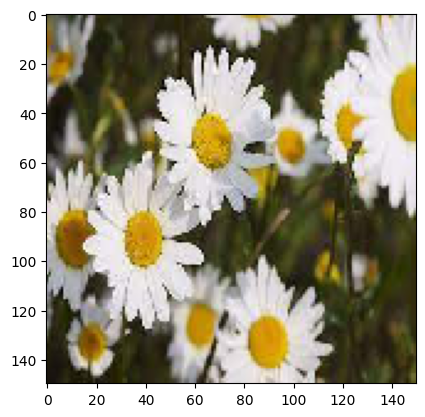

In [ ]:
img = load_img('/content/daisy.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print('Predict is: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])